In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Juan Sebastian Buitrago Díaz
*Métodos computacionales 2025-I*

---

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.interpolate import CubicHermiteSpline
import sympy as sp
import pandas as pd
import urllib.request

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

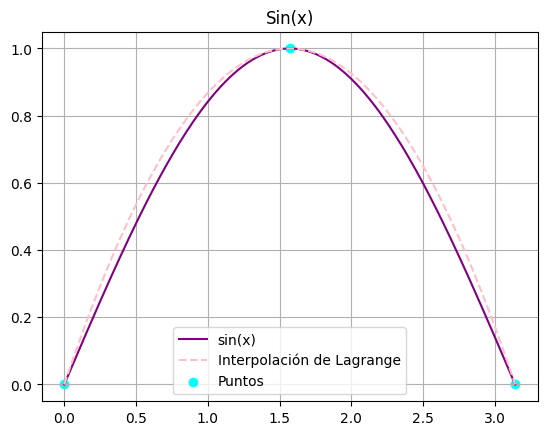

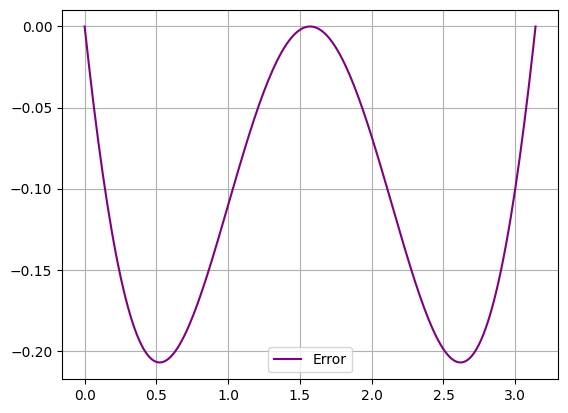

In [ ]:
#Función a interpolar
f = lambda x: np.sin(x)

#Puntos conocidos
x_i = np.array([0, np.pi/2, np.pi])
y_i = f(x_i)

#Interpolación de Lagrange
Pl = lagrange(x_i, y_i)

x_itp = np.linspace(0, np.pi, 100)
y_itp = f(x_itp)

#Evaluar
x_vals = np.linspace(0, np.pi, 200)
y_itp = f(x_vals)

#Error
#Definimos la tercera derivada de f(x)
f_3prime = lambda x: -np.cos(x)

#Calculamos el grado del polinomio
n = len(x_i) - 1

#Definimos la función de error del polinomio de interpolación de Lagrange
error = lambda x: (1/math.factorial(n+1))*f_3prime(x)*(x-x_i[0])*(x-x_i[1])*(x-x_i[2])

#Gráfica
plt.plot(x_vals, np.sin(x_vals), color="purple", label='sin(x)')
plt.plot(x_vals, Pl(x_vals), color="pink", ls='--', label='Interpolación de Lagrange')
plt.scatter(x_i, y_i, color="cyan", label='Puntos')
plt.title('Sin(x)')
plt.legend()
plt.grid()
plt.show()

#Grafica error
plt.plot(x_vals, error(x_vals), color = "purple", label='Error')
plt.legend()
plt.grid()
plt.show()

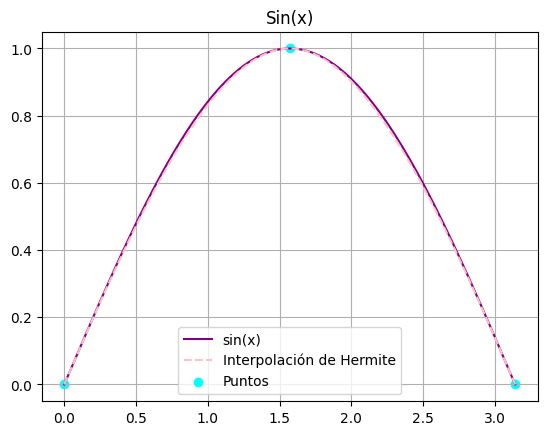

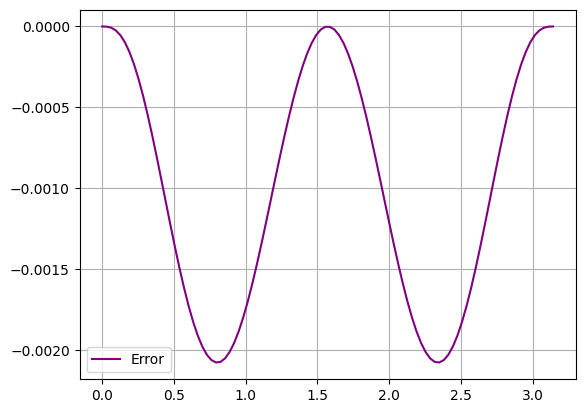

In [ ]:
#Función a interpolar
f = lambda x: np.sin(x)

#Puntos conocidos
x_i = np.array([0, np.pi/2, np.pi])
y_i = f(x_i)

#Derivadas
f_prime = lambda x: np.cos(x)
y_prime = f_prime(x_i)

#Interpolación de Hermite
Ph= CubicHermiteSpline(x_i, y_i, y_prime)

#Error
#Calculamos el grado del polinomio
n = len(x_i) - 1

#Definimos la sexta derivada de f(x)
f_6prime = lambda x: -np.sin(x)

#Definimos la función de error del polinomio de interpolación de Lagrange
error = lambda x: ((1/math.factorial(2*n+2))*(f_6prime(x))*((x-x_i[0])**2)*((x-x_i[1])**2)*((x-x_i[2])**2))

#Evaluamos
x_itp = np.linspace(min(x_i), max(x_i), 100)

# Gráfica
plt.plot(x_vals, np.sin(x_vals), color="purple", label='sin(x)')
plt.plot(x_vals, Ph(x_vals), color="pink", ls='--', label='Interpolación de Hermite')
plt.scatter(x_i, y_i, color="cyan", label='Puntos')
plt.title('Sin(x)')
plt.legend()
plt.grid()
plt.show()

#Grafica error
plt.plot(x_itp, error(x_itp), color = "purple", label='Error')
plt.legend()
plt.grid()
plt.show()

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [ ]:
#Funciones
def diferencia_dividida(x, y, i, j):
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
        return num / den

def coeficientes_a(x, y):
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
  coef = coeficientes_a(x, y)
  def P(x_val):
    resultado = coef[0]
    producto = 1
    for i in range(1, len(x)):
      producto *= (x_val - x[i - 1])
      resultado += coef[i] * producto
    return resultado
  return P

  def Breit(E, sigma_0):
    return sigma_0 / (((E - E_r)**2) + ((Gamma**2) / 4))

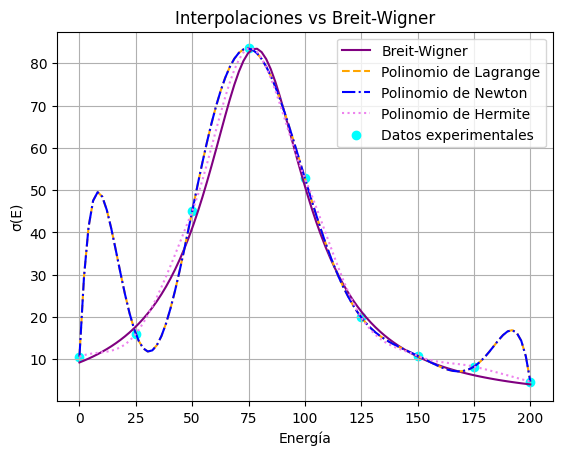

In [ ]:
Energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
E_r = 78
Gamma = 55
d_sigma = np.gradient(sigma_exp, Energia)

#Polinomios de interpolación
#Polinomio de Lagrange
Pl = lagrange(Energia, sigma_exp)

#Polinomio de interpolación de Newton
Pn = Polinomio_Newton(Energia, sigma_exp)

#Polinomio de Hermite
Ph = CubicHermiteSpline(Energia, sigma_exp, d_sigma)

#Evaluamos
x_itp = np.linspace(0, 200, 100)
lagrange_vals = Pl(x_itp)
newton_vals = Pn(x_itp)
hermite_vals = Ph(x_itp)

sigma_max = 83.5
sigma_0 = sigma_max * (Gamma**2) / 4
sigma_teorica = Breit(x_itp, sigma_0)

#Grafica
plt.plot(x_itp, sigma_teorica, color="purple", label='Breit-Wigner')
plt.plot(x_itp, lagrange_vals, color="orange", ls='--', label='Polinomio de Lagrange')
plt.plot(x_itp, newton_vals, color="blue", ls='-.', label='Polinomio de Newton')
plt.plot(x_itp, hermite_vals, color="violet", ls=':', label='Polinomio de Hermite')
plt.scatter(Energia, sigma_exp, color='cyan', label='Datos experimentales')
plt.title('Interpolaciones vs Breit-Wigner')
plt.xlabel('Energía')
plt.ylabel('σ(E)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Error
error_lagrange = np.max(np.abs(sigma_teorica - lagrange_vals))
error_newton = np.max(np.abs(sigma_teorica - newton_vals))
error_hermite = np.max(np.abs(sigma_teorica - hermite_vals))

print(f'Error Lagrange: {error_lagrange}')
print(f'Error Newton: {error_newton}')
print(f'Error Hermite: {error_hermite}')
#El mejor polinomio de interpolación es el de hermite

Error Lagrange: 38.33031026744193
Error Newton: 38.330310267442
Error Hermite: 4.610679651700707


# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

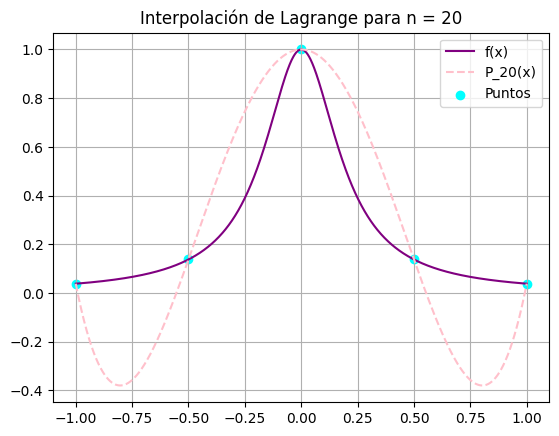

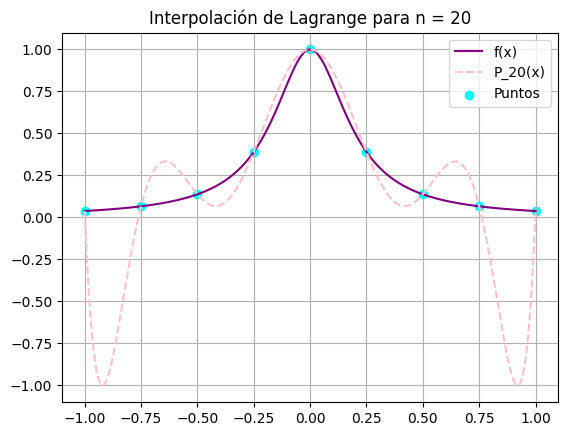

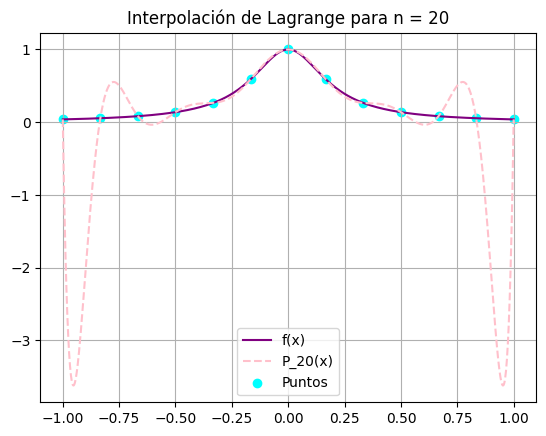

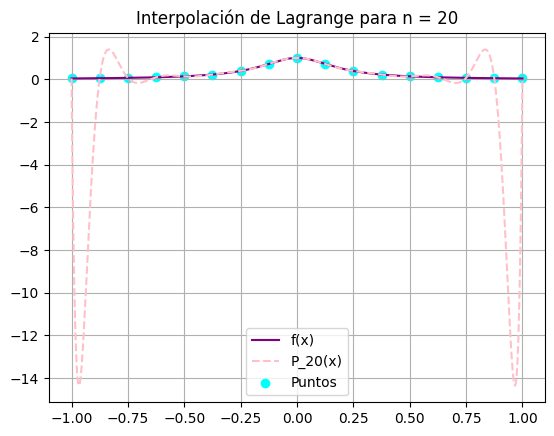

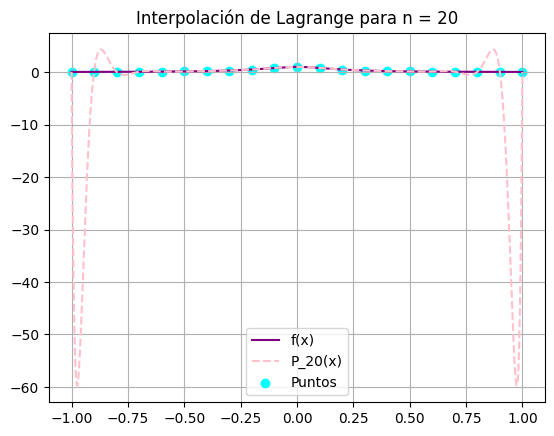

In [ ]:
#Función a interpolar
f=lambda x: 1/(1+25*x**2)

#Puntos conocidos
n_i = [4, 8, 12, 16, 20]
x_i = np.linspace(-1, 1, 1000)
y_i = f(x_i)

#Polinomio evaluado en cada valor de n
for i in n_i:
    x = np.linspace(-1, 1, i + 1)
    y = f(x)
    Pl = lagrange(x, y)
    y_itp = Pl(x_i)

    #Grafica
    plt.plot(x_i, y_i, color='purple', label='f(x)')
    plt.plot(x_i, y_itp, label=f'P_{n}(x)', color= 'pink', linestyle='--')
    plt.scatter(x, y, color="cyan", label='Puntos')
    plt.title(f'Interpolación de Lagrange para n = {n}')
    plt.legend()
    plt.grid()
    plt.show()

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

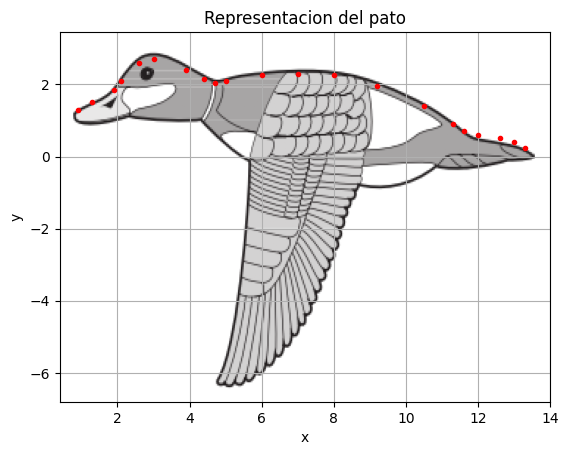

In [ ]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

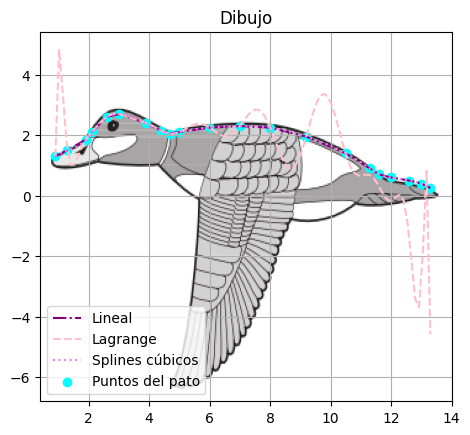

In [ ]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
x_i = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
y_i = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

x_itp = np.linspace(min(x_i), max(x_i), 100)

#Interpolación lineal
Il = interp1d(x_i, y_i)
Fi = Il(x_itp)

#Interpolación de lagrange
Pl = lagrange(x_i, y_i)
Fl = Pl(x_itp)

#Interpolación por splines cúbicos
Ps = CubicSpline(x_i, y_i)
Fs = Ps(x_itp)


#Grafica
plt.title('Dibujo')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(x_itp, Fi, color="purple", ls='-.', label='Lineal')
plt.plot(x_itp, Fl, color="pink", ls='--', label='Lagrange')
plt.plot(x_itp, Fs, color="violet", ls=':', label='Splines cúbicos')
plt.scatter(x_i, y_i, color="cyan", label='Puntos del pato')
plt.legend()
plt.grid()
plt.show()

#La que más oscila es la de Lagrange

# 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.